### "Monkey Hand"
Now lets generate a "monkey hand" and align the neurons in a topology of a mesh.
After tinkering with Desmos, I created the graph below using an elipse and 4 parabolas:

![graph](desmos.png)

In [242]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [243]:
def create_hand(sample_num):
    data = {}
    for i in range(sample_num):
        x, y = np.random.uniform(size=2)
        # if the point (x,y) is in one of the formulas that make the hand
        in_hand = y <= -(11*x-2.3)**6 + 0.83 or \
                  y <= -(11*x-4.6)**6 + 0.98 or \
                  y <= -(11*x-6.9)**6 + 0.93 or \
                  y <= -(11*x-9.2)**6 + 0.7 or \
                  ((x-0.525)/1.6)**2 + y**2 <= 0.25**2
        while not in_hand:
            x, y = np.random.uniform(size=2)
            in_hand = y <= -(11*x-2.3)**6 + 0.83 or \
                  y <= -(11*x-4.6)**6 + 0.98 or \
                  y <= -(11*x-6.9)**6 + 0.93 or \
                  y <= -(11*x-9.2)**6 + 0.7 or \
                  ((x-0.525)/1.6)**2 + y**2 <= 0.25**2
        data.update({i: (x, y)})
    return data

We will use our implementation of the SOM algorithm.

In [244]:
def create_neurons_2D(sqrt_neurons_num):
    neurons = {}
    for i in range(sqrt_neurons_num):
        for j in range(sqrt_neurons_num):
            neurons.update({(i, j): [0.45 + i*(0.1/sqrt_neurons_num), 0.45 + j*(0.1/sqrt_neurons_num)]})
    
    return neurons

def decide_winner(p, N):
    min_dist = float("inf")
    winner_index = 0
    for n in N.keys():
        dist = 0
        for i in range(len(p)):
            dist += (p[i] - N[n][i])**2
        dist = math.sqrt(dist)
        if dist < min_dist:
            winner_index = n
            min_dist = dist
    return winner_index

def update_weights_2D(N, c, X, alpha, sigma, radius):
    for j in N.keys():
        if (j[0]-c[0])**2 + (j[1]-c[1])**2 < radius**2:
            S = (c[0] - j[0])**2 + (c[1] - j[1])**2
            h = math.exp(-(S)/(2*(sigma**2)))
            for i in range(len(X)):
                N[j][i] = N[j][i] + alpha * h * (X[i] - N[j][i])
    return N

def display_2D(P, N, t):
    px, py = [], []
    for i in P.keys():
        px.append(P[i][0])
        py.append(P[i][1])
    plt.plot(px, py, 'ro')

    for i in range(int(math.sqrt(len(N)))):
        nx, ny = [], []
        for j in range(int(math.sqrt(len(N)))):
            nx.append(N[(i, j)][0])
            ny.append(N[(i, j)][1])
        plt.plot(nx, ny, 'bo-')
        nx, ny = [], []
        for j in range(int(math.sqrt(len(N)))):
            nx.append(N[(j, i)][0])
            ny.append(N[(j, i)][1])
        plt.plot(nx, ny, 'bo-')

    plt.title("epoch = " + str(t))
    plt.show()

def train_2D(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius):
    for t in range(epoches):
        if t % 50 == 0:
            display_2D(P, N, t)
        for p in range(len(P)):
            alpha = learning_rate * (1-(t/epoches))
            sigma = neighborhood_size * (1-(t/epoches))
            radius = round(neighborhood_radius * (1-(t/epoches)))
            c = decide_winner(P[p], N)
            N = update_weights_2D(N, c, P[p], alpha, sigma, radius)

    display_2D(P, N, epoches)

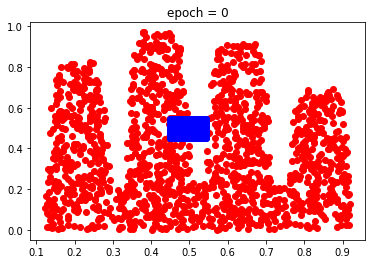

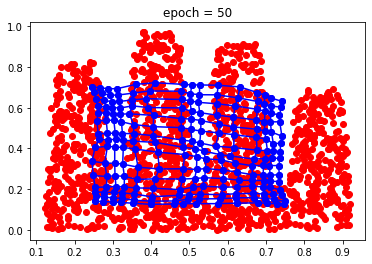

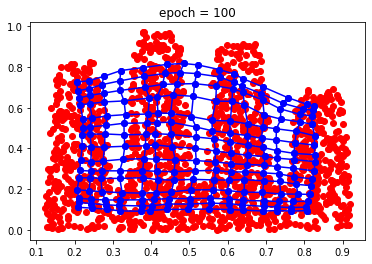

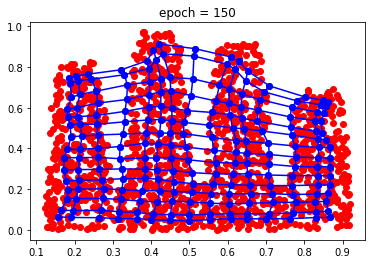

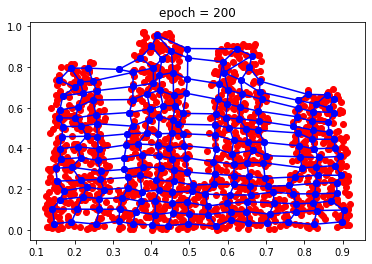

In [245]:
P = create_hand(1500)
N = create_neurons_2D(15)

epoches = 200
learning_rate = 0.1
neighborhood_size = 5
neighborhood_radius = math.sqrt(len(N))/2

train_2D(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius)

The neurons spread across the hand. There are no neurons between the fingers, and each finger is "connected" with the those next to it with the neurons.

Now let's execute the same process but remove one finger from the hand in the middle of the iteration (by removing the formula for the second finger).

In [212]:
def create_hand_missing_finger(sample_num):
    data = {}
    for i in range(sample_num):
        x, y = np.random.uniform(size=2)
        # the formula  y <= -(11*x-4.6)**6 + 0.98  is missing
        in_hand = y <= -(11*x-2.3)**6 + 0.83 or \
                  y <= -(11*x-6.9)**6 + 0.93 or \
                  y <= -(11*x-9.2)**6 + 0.7 or \
                  ((x-0.525)/1.6)**2 + y**2 <= 0.25**2
        while not in_hand:
            x, y = np.random.uniform(size=2)
            in_hand = y <= -(11*x-2.3)**6 + 0.83 or \
                  y <= -(11*x-6.9)**6 + 0.93 or \
                  y <= -(11*x-9.2)**6 + 0.7 or \
                  ((x-0.525)/1.6)**2 + y**2 <= 0.25**2
        data.update({i: (x, y)})
    return data

def train_switch_data(P, N, c, learning_rate, neighborhood_size, neighborhood_radius):
    for t in range(epoches):
        if t % 50 == 0:
            display_2D(P, N, t)

        # we have reached the middle of the iteration
        if int(epoches/2) == t:
            display_2D(P, N, t)
            # chenge the data
            P = create_hand_missing_finger(len(P))
            display_2D(P, N, t)
            
        for p in range(len(P)):
            alpha = learning_rate * (1-(t/epoches))
            sigma = neighborhood_size * (1-(t/epoches))
            radius = round(neighborhood_radius * (1-(t/epoches)))
            c = decide_winner(P[p], N)
            N = update_weights_2D(N, c, P[p], alpha, sigma, radius)

    display_2D(P, N, epoches)

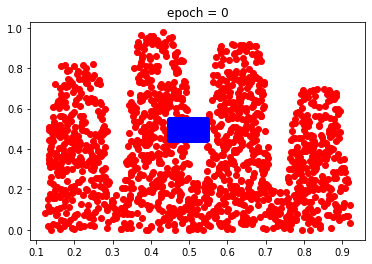

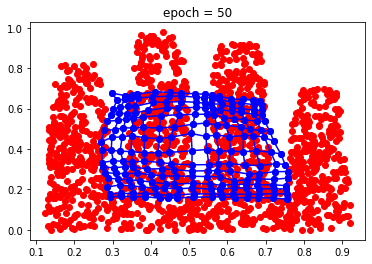

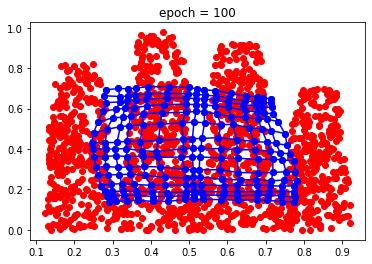

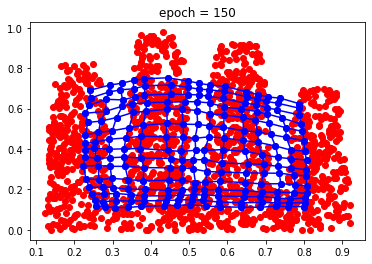

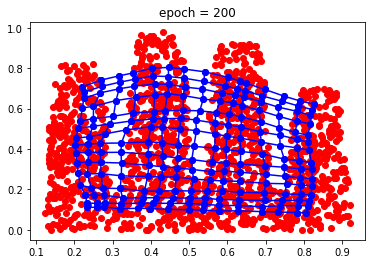

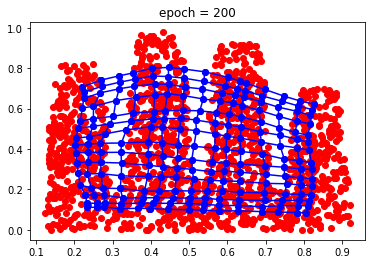

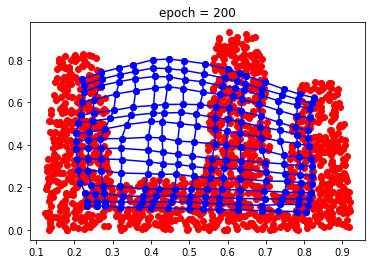

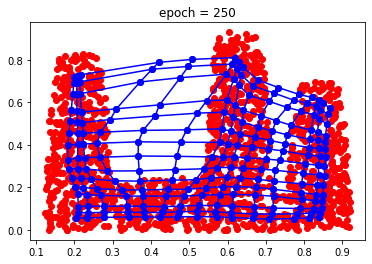

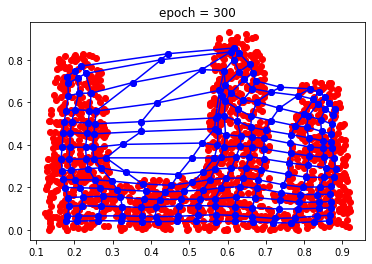

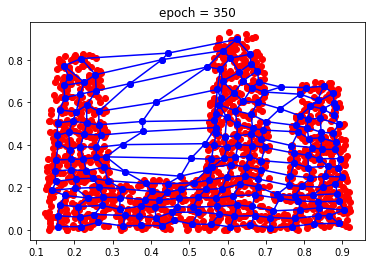

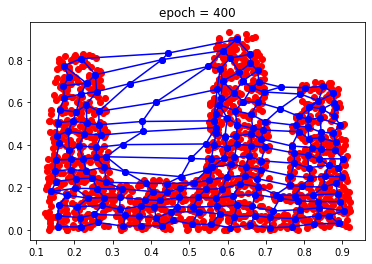

In [250]:
P = create_hand(1500)
N = create_neurons_2D(15)

epoches = 400
learning_rate = 0.1
neighborhood_size = 5
neighborhood_radius = math.sqrt(len(N))/2

train_switch_data(P, N, epoches, learning_rate, neighborhood_size, neighborhood_radius)

At first, the neurons spread across the shape as usual, but after cutting a finger, the neurons that were getting closer the that finger started going to the fingers next to it instead.